# **ENGG680 - Introduction to Digital Engineering**
## *GROUP PROJECT: PREDICTIVE MODEL FOR EFFICIENT WATER MANAGEMENT SYSTEM IN CANADA (CALGARY)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Gayatri | An | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |
| Member 5: | First Name | Last Name | Signature | Hours | Contribution |
| Member 6: | First Name | Last Name | Signature | Hours | Contribution |
| Member 7: | First Name | Last Name | Signature | Hours | Contribution |
| Member 8: | First Name | Last Name | Signature | Hours | Contribution |


# **DATA VISUALIZATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 0.1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 0.2: Load Data sets

In [5]:
water_quality_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Water Quality Data.csv')
historical_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Historical Data.xlsx')
weather_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Weather Data.csv')
real_time_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Real Time Data.xlsx')
#Display first few rows of each data set
print("Water Quality Data:")
print(water_quality_data.head())

print("Historical Data:")
print(historical_data.head())

print("Weather Data:")
print(weather_data.head())

print("Real-Time Data:")
print(real_time_data.head())

Water Quality Data:
        Date  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
0  1/20/2014            0.06                       13.560000    7.980000   
1  1/21/2014            0.06                       13.554627    7.978149   
2  1/22/2014            0.06                       13.542525    7.979391   
3  1/23/2014            0.06                       13.530448    7.980630   
4  1/24/2014            0.06                       13.518394    7.981867   

   TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year  Day  
0          -0.030000   3.100000        1.430000           20   20  
1          -0.202312   3.403106        1.484332           21   21  
2          -0.366397   3.667098        1.480835           22   22  
3          -0.529686   3.930075        1.477341           23   23  
4          -0.692182   4.192037        1.473849           24   24  
Historical Data:
        Date  Day_of_Year    Year  Day  \
0 2014-01-01          1.0  2014.0  1.0   
1 2014-01-02  

### 1. Creating Plots for Data Collected

Step 1.1: Visualizing Water Quality Data

--- Visualizing Water Quality Data ---


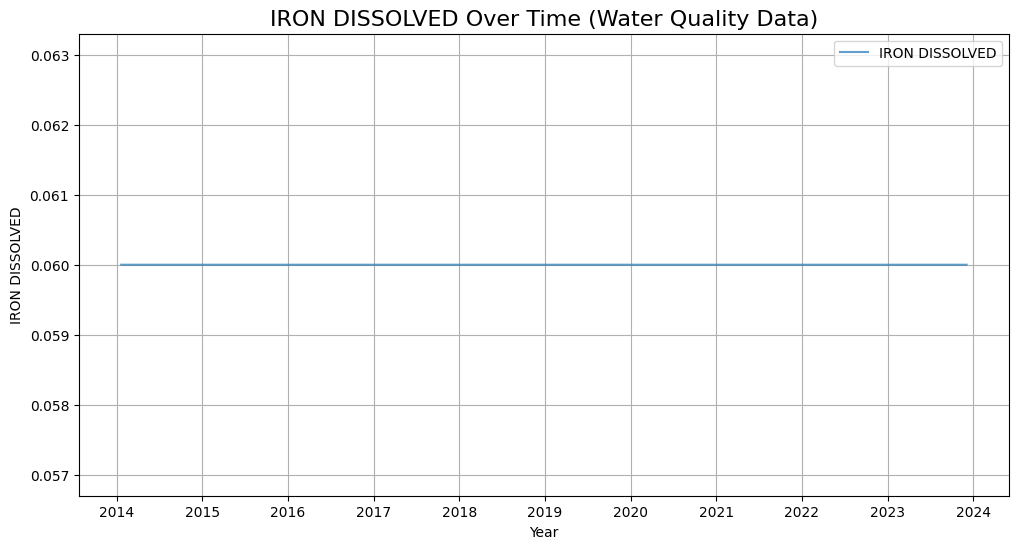

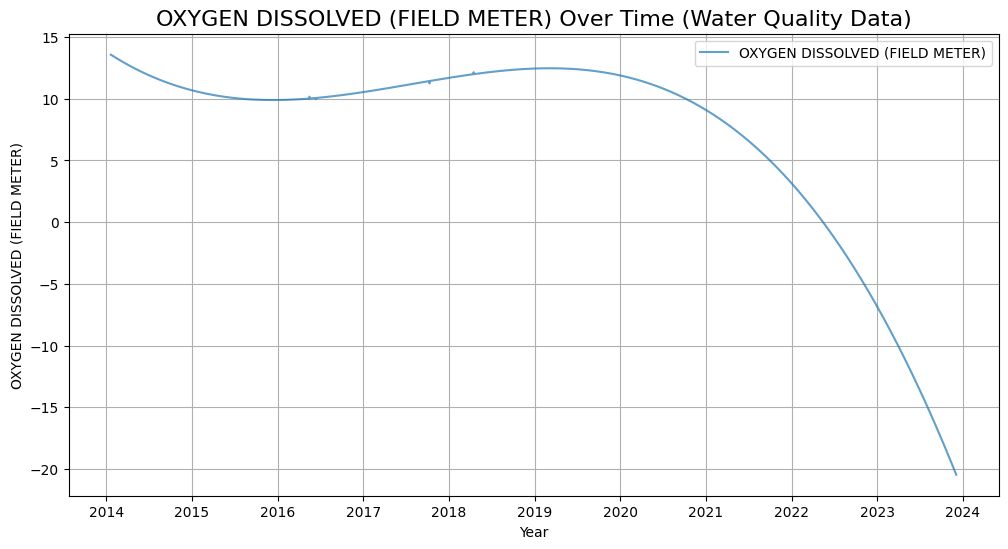

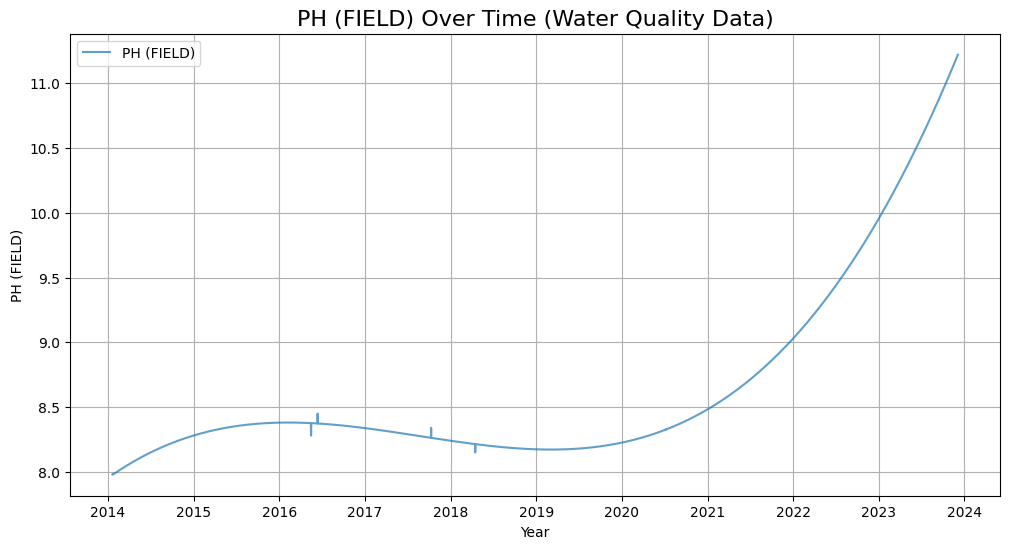

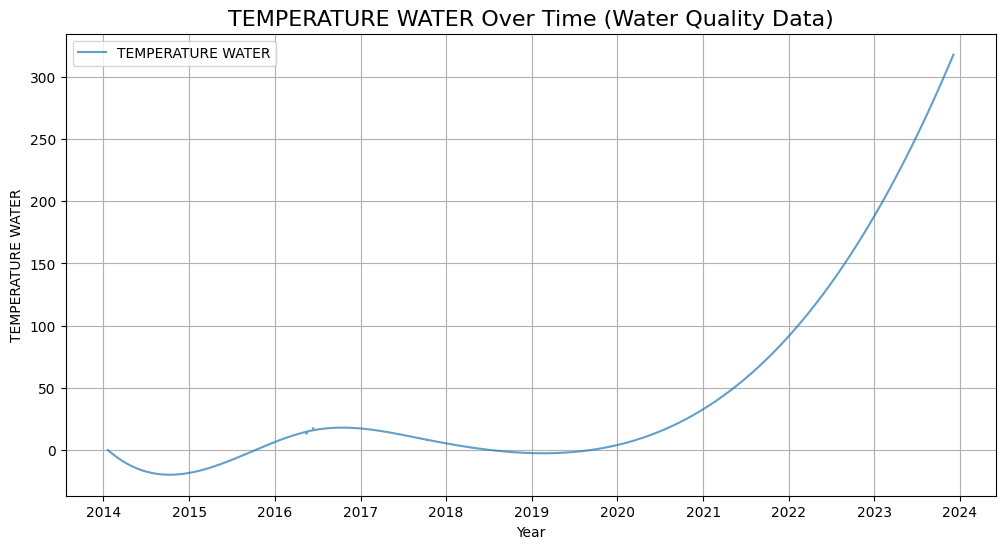

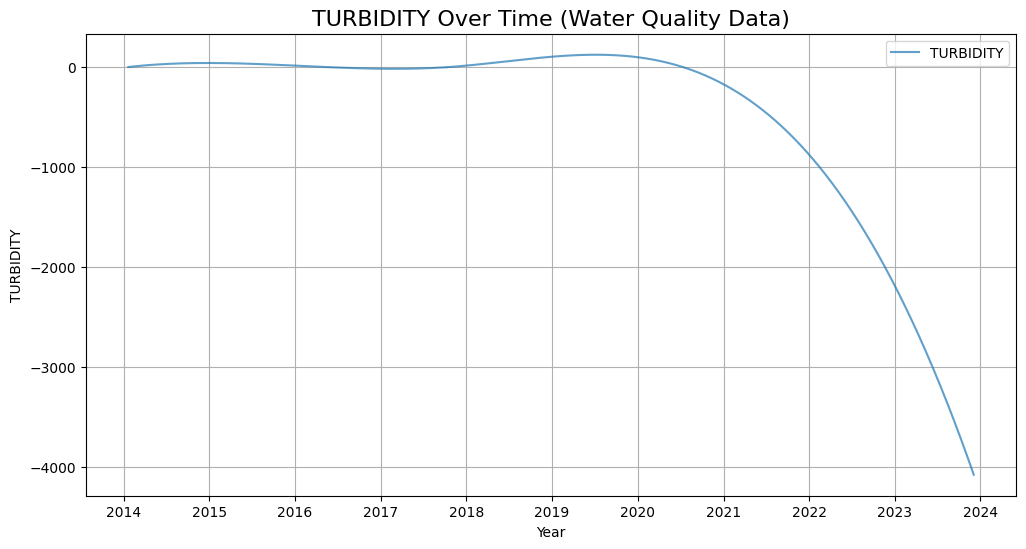

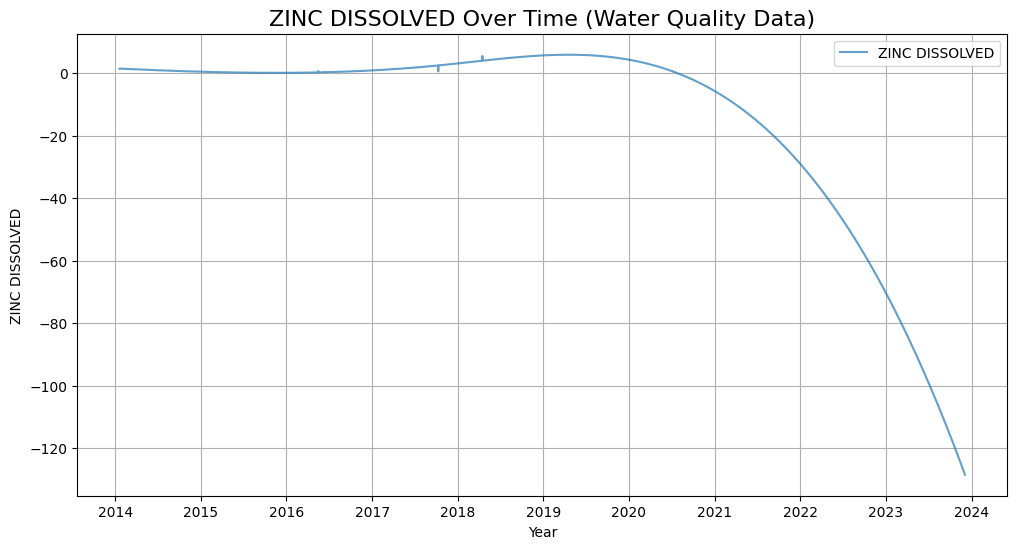

In [7]:
print("--- Visualizing Water Quality Data ---")

# Ensure 'Date' is in datetime format
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'], errors='coerce')

# Select numeric features excluding day-related columns
water_quality_features = water_quality_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Day_of_Year', 'Day'])


# Line Plots
for feature in water_quality_features:
    plt.figure(figsize=(12, 6))
    plt.plot(water_quality_data['Date'], water_quality_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Water Quality Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()



Step 1.2: Visualizing Historical Data

--- Visualizing Historical Data ---


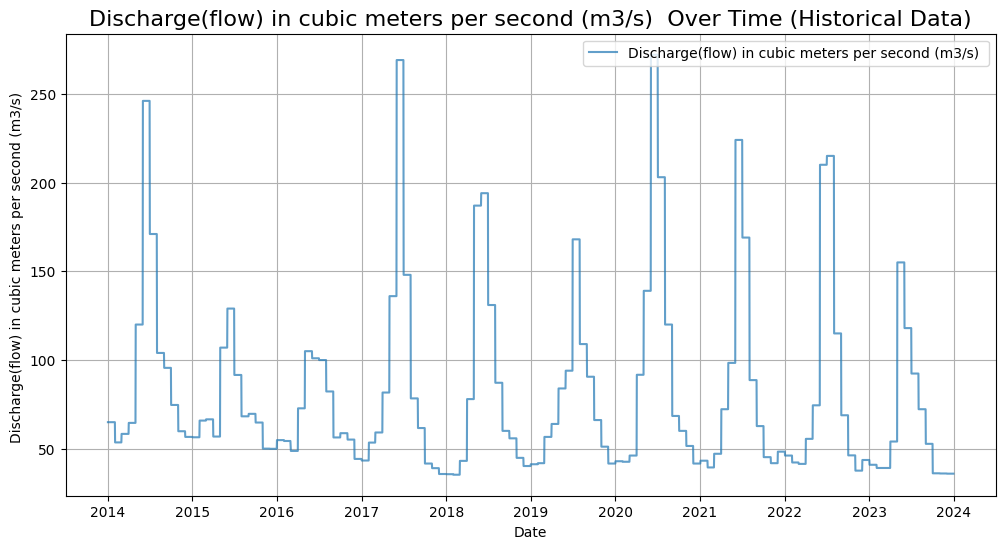

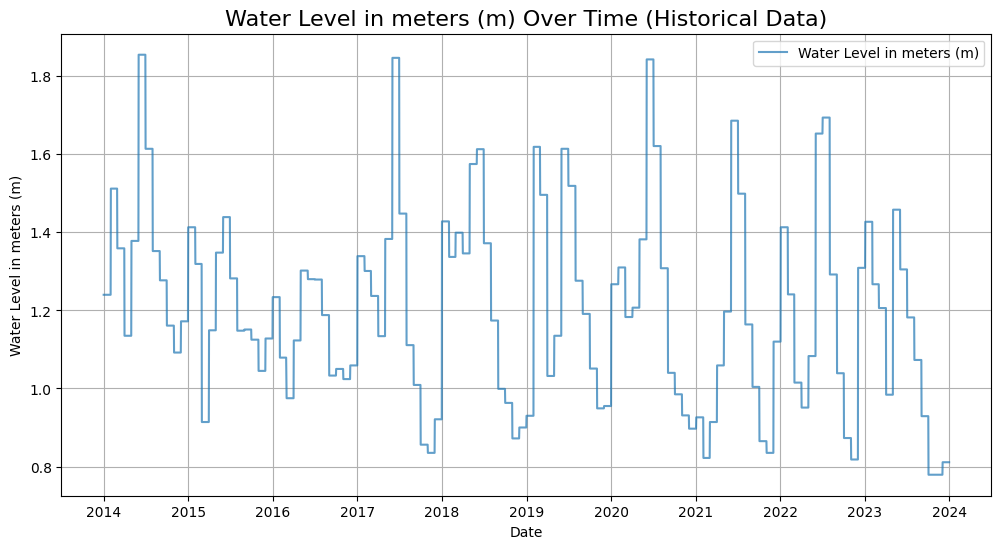

In [8]:
print("--- Visualizing Historical Data ---")

# Ensure 'Date' is in datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'], errors='coerce')

# Select numeric features excluding 'Year', 'Day_of_Year', and 'Day'
historical_features = historical_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Year', 'Day_of_Year', 'Day'])

# Line Plots
for feature in historical_features:
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data['Date'], historical_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Historical Data)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

Step 1.3: Visualizing Weather Data

Visualizing Line Plots for Weather Data


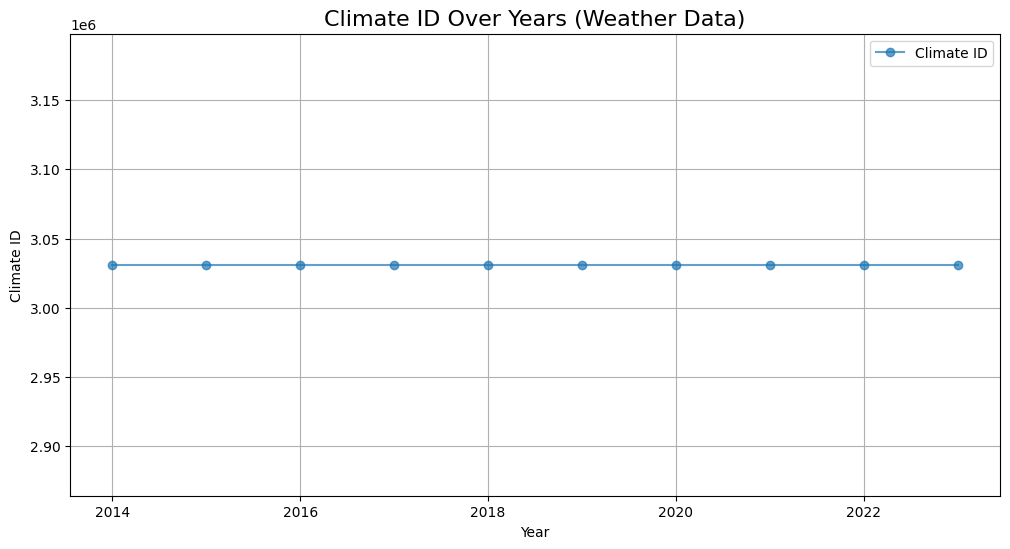

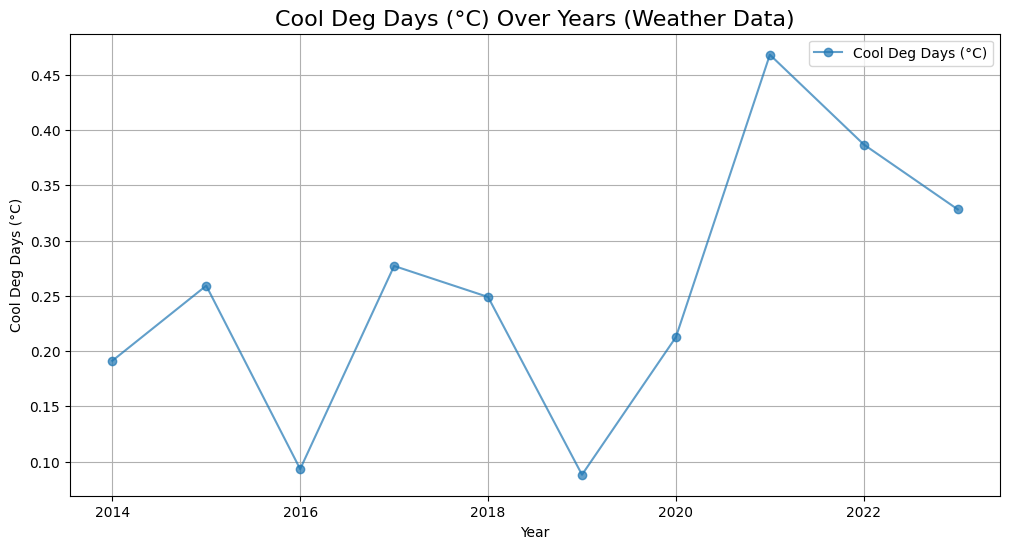

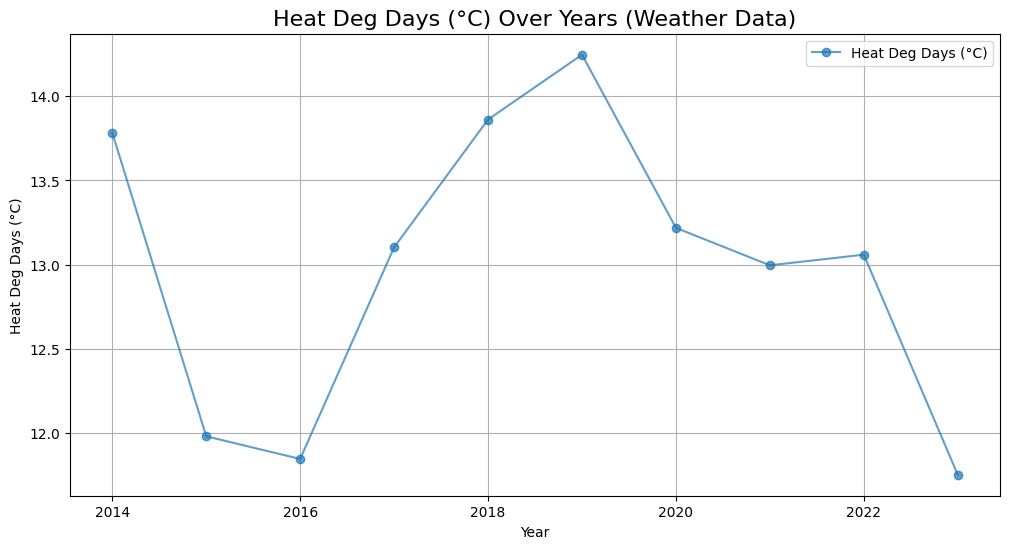

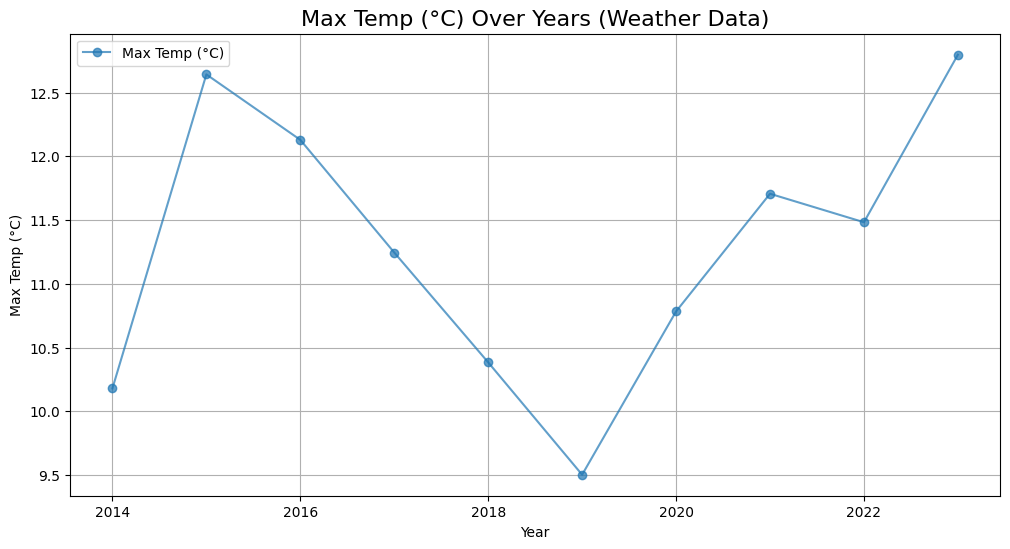

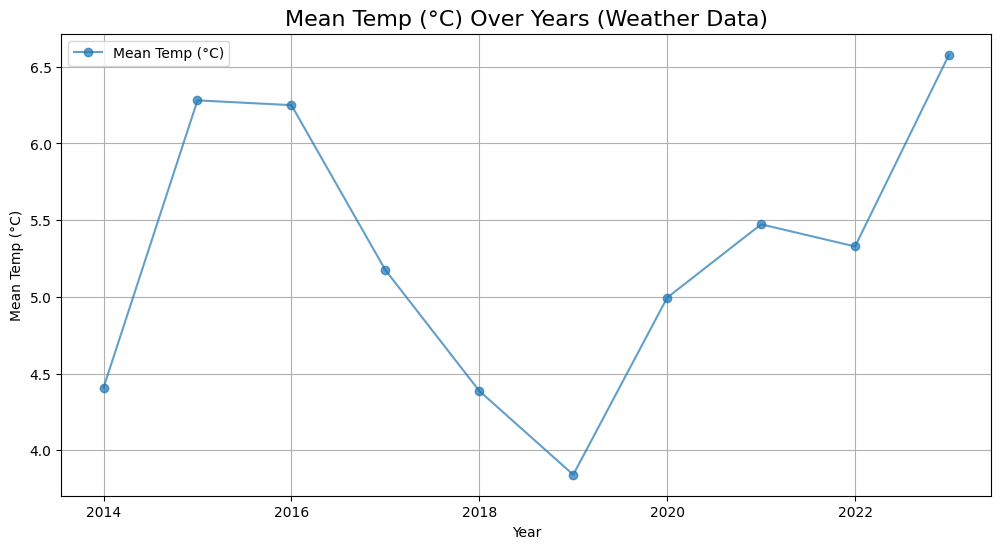

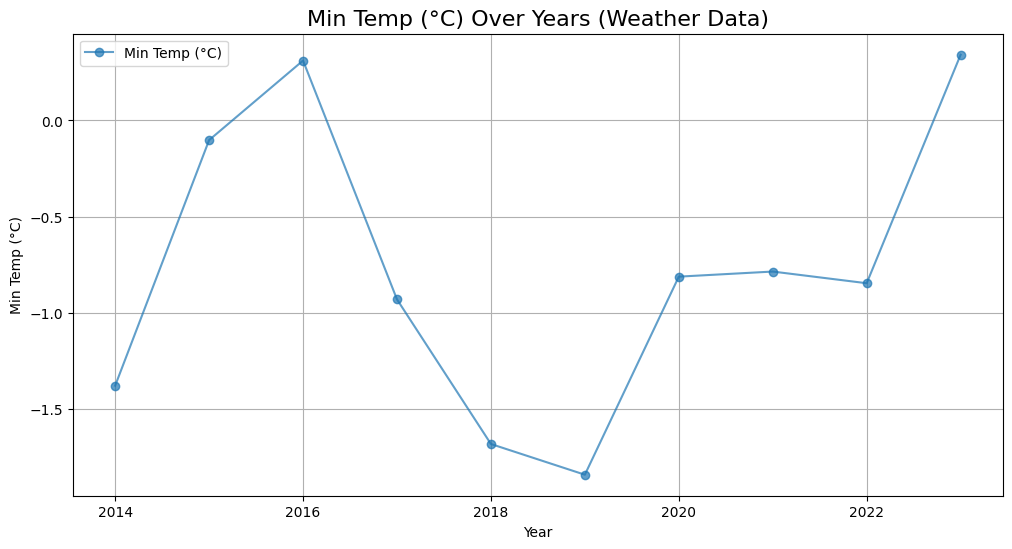

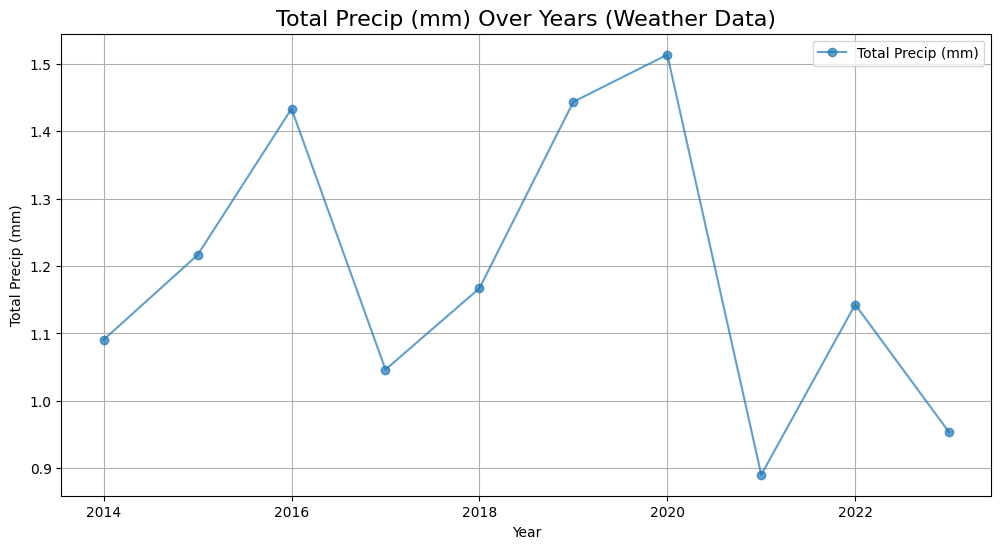

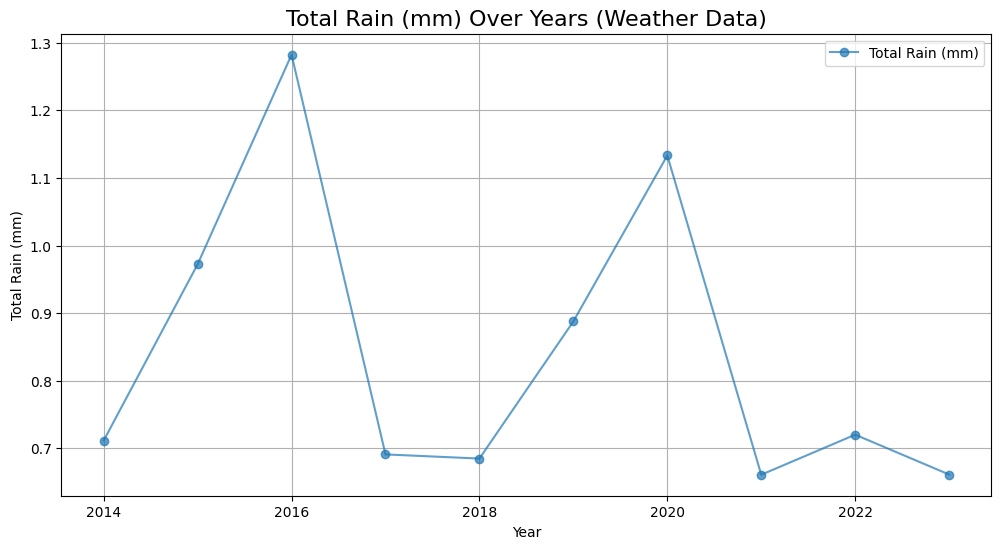

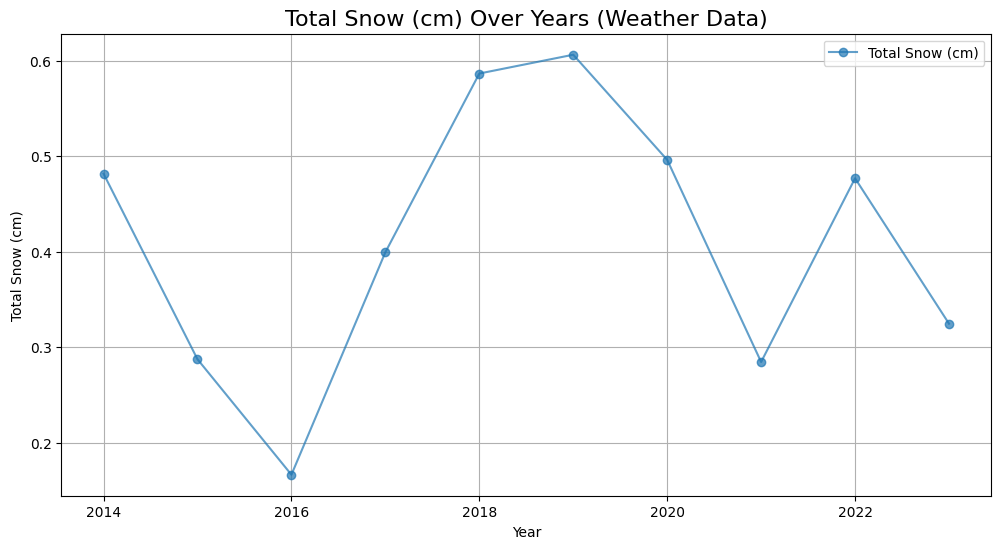

In [9]:
print("Visualizing Line Plots for Weather Data")

# Ensure 'Date' is in datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Extract the 'Year' from the 'Date' column
weather_data['Year'] = weather_data['Date'].dt.year

# Select numeric features excluding irrelevant columns
weather_features = weather_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Longitude (x)', 'Latitude (y)', 'Day_of_Year', 'Day'])

# Aggregate features by year using the mean
annual_data = weather_data.groupby('Year')[weather_features].mean().reset_index()

# Plot line plots for each feature against Year
for feature in weather_features:
    plt.figure(figsize=(12, 6))
    plt.plot(annual_data['Year'], annual_data[feature], label=feature, marker='o', alpha=0.7)
    plt.title(f'{feature} Over Years (Weather Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()
    plt.show()


Step 1.4: Visualizing Real Time Data

Visualizing Water Level and Discharge of Real-Time Data


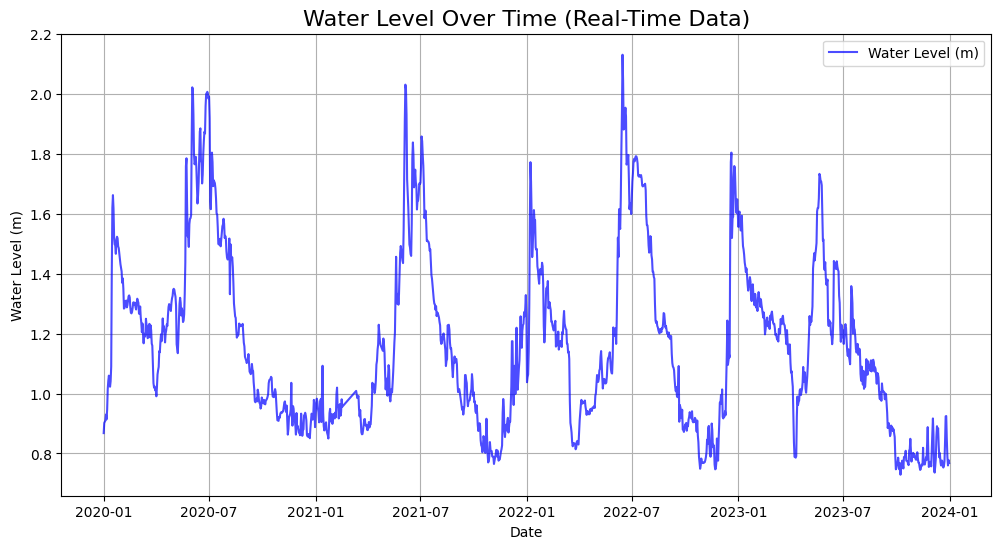

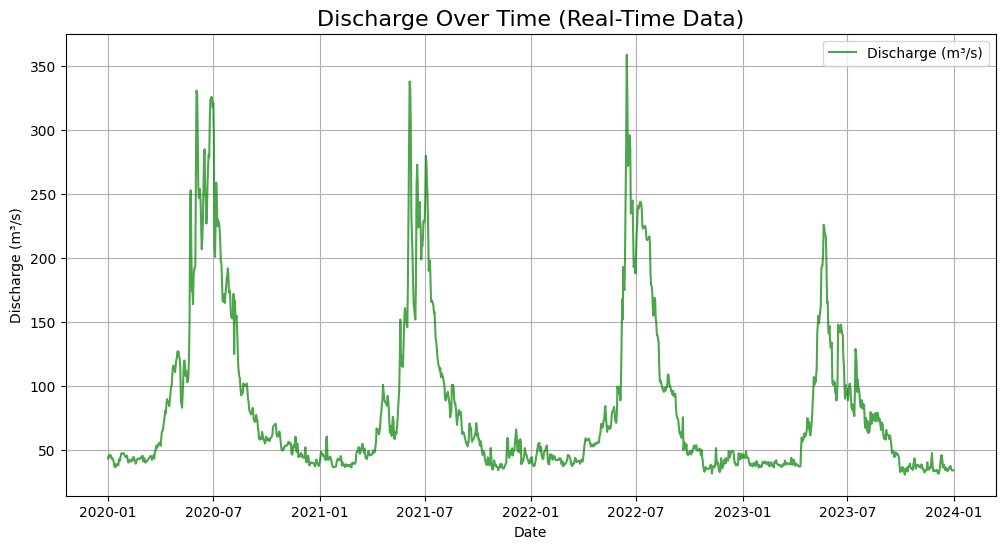

In [11]:
print("Visualizing Water Level and Discharge of Real-Time Data")

# Ensure 'Date/Time' is in datetime format
real_time_data['Date'] = pd.to_datetime(real_time_data['Date'], errors='coerce')

# Plot Water Level
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Water Level Daily Mean Value (m)'], label='Water Level (m)', color='blue', alpha=0.7)
plt.title('Water Level Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid()
plt.show()

# Plot Discharge
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Discharge Daily Mean Value (m3/s)'], label='Discharge (m³/s)', color='green', alpha=0.7)
plt.title('Discharge Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid()
plt.show()

# **Model Development without Real Time Data (Part 1)**

### 2. Linear Regression Model


Step 2.1: Preprocessing: Ensure date compatibility and merge datasets

Step 2.2: Model Training and Performance Evaluation

Step 2.3: Visualising Results

Step 2.4: Apply K4 Method

Step 2.5: Calculate the overall Performance Metrics from K4 Method

Step 2.6: Visualising K4 Method Results

Step 2.7: Comparison of Performance Metric

### 3. Random Forest Model


Step 3.1: Model Training and Performance Evaluation

Step 3.2: Visualising Results

Step 3.3: Apply K4 Method

Step 3.4: Calculate the overall Performance Metrics from K4 Method

Step 3.5: Visualising K4 Method Results

Step 3.6: Comparison of Performance Metric

### 4. Model Comparison

Step 4.1: Linear Regression vs Random Forest (Visualization)

Step 4.2: Justfication the use of Random Forest Model

give justification :::::

### 5. Predicting Water Consumption without Real Time Data


In [ ]:
#Please Write code to predict data without using real time data

# **Model Development with Real Time Data**

### 6. Feature Engineering

(Give justification of why we using it)


Step 6.1: Preprocessing: Ensure date compatibility and merge datasets

Step 6.2: Add New Features

In [ ]:
# Add Rolling Averages

# Add Lagged Features

# Add Interaction Features

# Drop rows with NaN values resulting from rolling and lagged feature calculations

# Display the updated dataset

Step 6.3: Visualize New Features

Step 6.4: Display Heatmap

(Justify its use)

### 7. Model Development and Performance Evaluation

Step 7.1: Training both Models and Evaluating Performance

Step 7.2: Visualising Results

Step 7.3: Apply K4 Method

Step 7.4: Calculate the overall Performance Metrics from K4 Method

Step 7.5: Visualising K4 Method Results

Step 7.6: Comparison of both Model Performance Metric

(Justify Using Random Forest Model)

# **Model Comparison: Real Time Data vs Historical Data**

Step 8.1: Comparison Table Creation

Step 8.2: Visualising Results

# **Future Consumption Prediction**

Step 9.1: Predict Consumption Using Real Time Data

(Give Justification)

# **Conclusion**

(Write here)